In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [92]:
data1 = '/Users/leona/OneDrive/Documentos/GitHub/wine-classification/wine_prices/wine_data/wineQualityReds.csv'
data2 = '/Users/leona/OneDrive/Documentos/GitHub/wine-classification/wine_prices/wine_data/wineQualityWhites.csv'

In [93]:
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df1['type'] = [0 for i in  range(len(df1))]
df2['type'] = [1 for i in  range(len(df2))]

df_concat = pd.concat([df1, df2], ignore_index=True)
df = shuffle(df_concat)


In [94]:
display(df.head())

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
6491,4893,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,1
3882,2284,7.4,0.33,0.26,15.6,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5,1
6246,4648,5.8,0.26,0.29,1.0,0.042,35.0,101.0,0.99044,3.36,0.48,11.4,7,1
727,728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,5,0
814,815,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6,0


In [95]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [96]:
display(df.isna().sum())

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

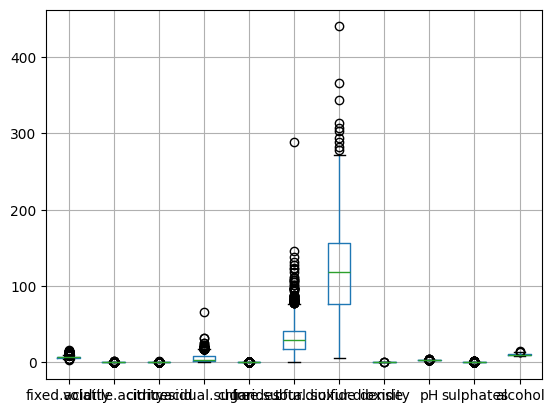

In [97]:
df.boxplot(column=['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
plt.show()

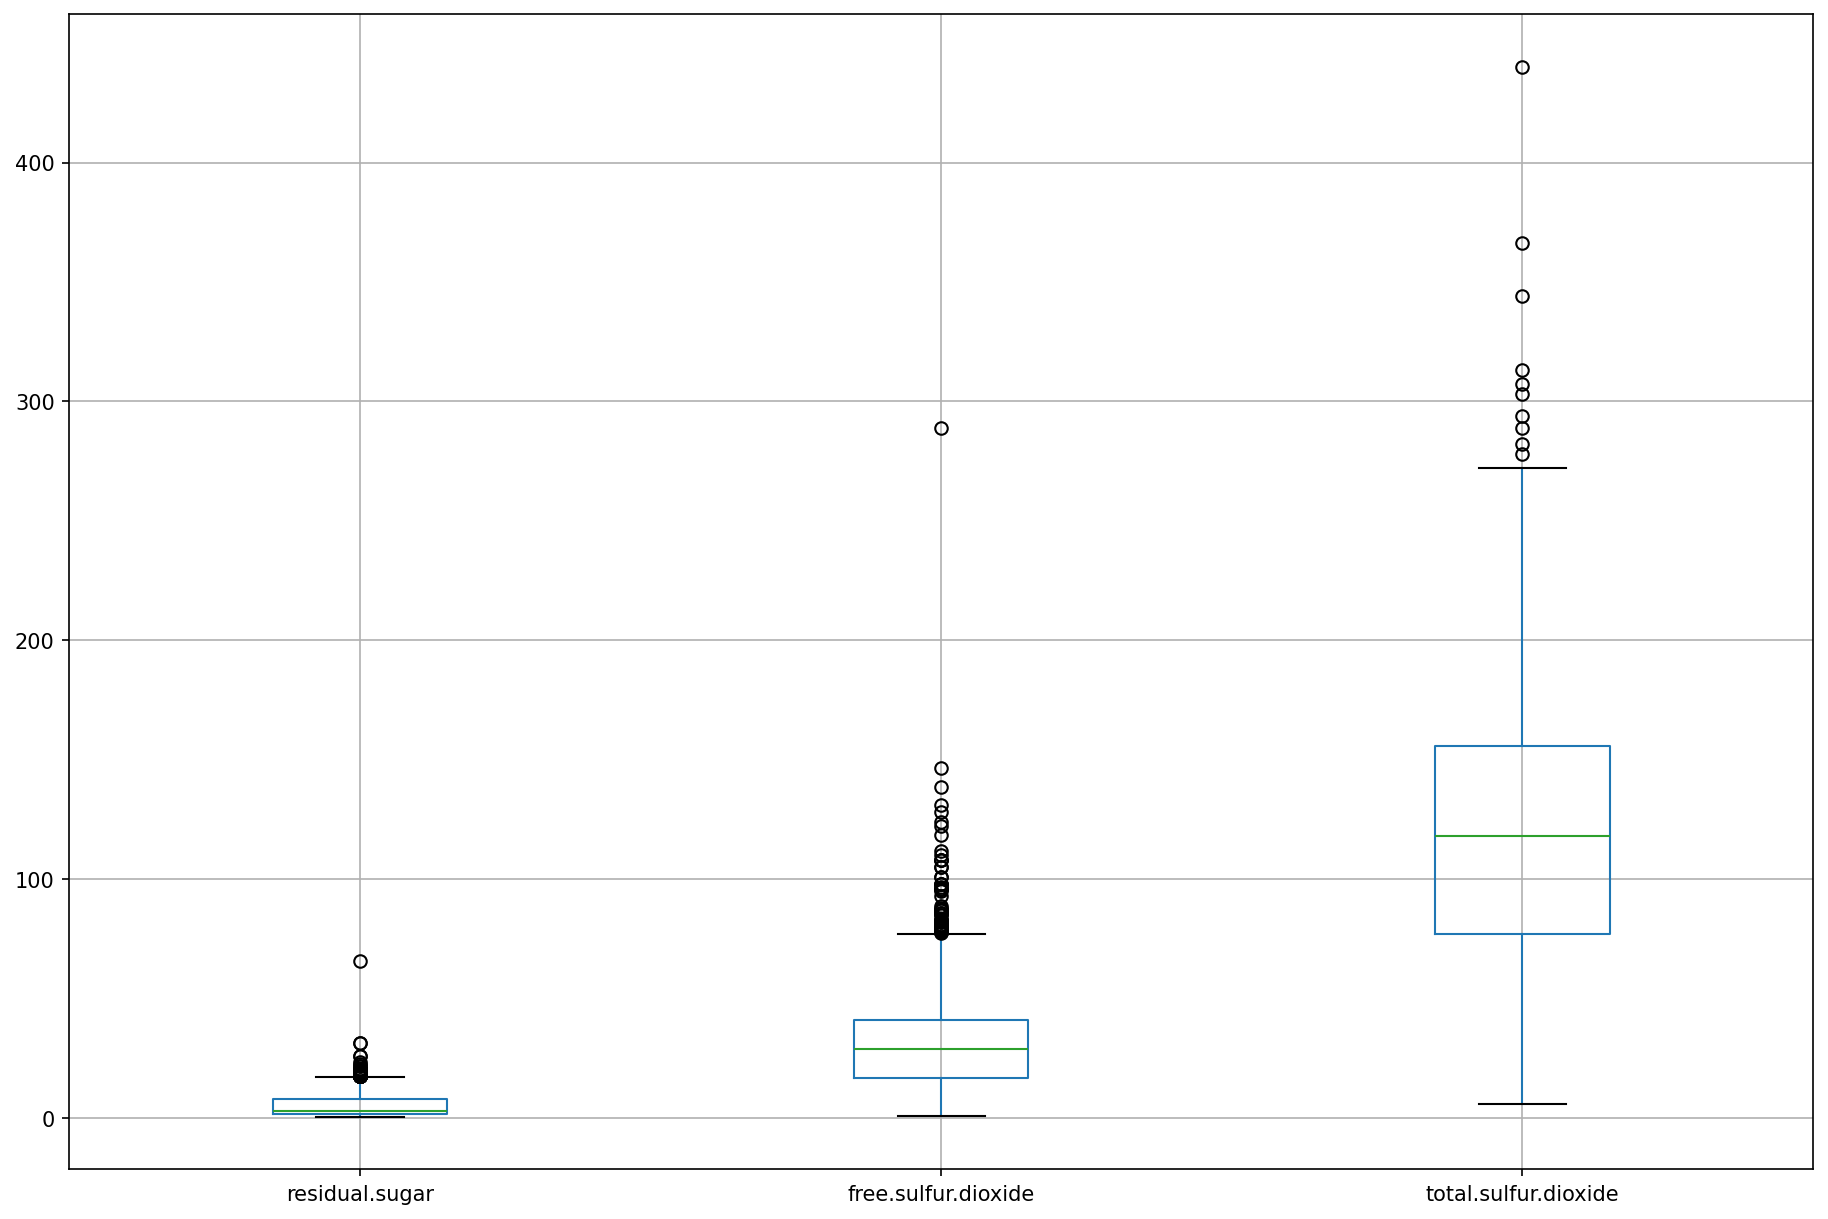

In [98]:
plt.figure(figsize=(15, 10), dpi=150)
df.boxplot(column=['residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide'])
plt.show()

In [99]:
q1 = df['residual.sugar'].quantile(0.25)
q3 = df['residual.sugar'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_residual_sugar = df[(df['residual.sugar'] < limite_inferior) | (df['residual.sugar'] > limite_superior)]

display(outliers_residual_sugar)
print(len(outliers_residual_sugar))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
5716,6.2,0.350,0.20,18.10,0.069,33.0,158.0,0.99908,3.15,0.50,8.8,6,1
2002,7.1,0.270,0.31,18.20,0.046,55.0,252.0,1.00000,3.07,0.56,8.7,5,1
3123,6.6,0.210,0.49,18.15,0.042,41.0,158.0,0.99970,3.28,0.39,8.7,6,1
5483,6.0,0.280,0.24,17.80,0.047,42.0,111.0,0.99896,3.10,0.45,8.9,6,1
3035,8.5,0.560,0.74,17.85,0.051,51.0,243.0,1.00050,2.99,0.70,9.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,8.4,0.220,0.28,18.80,0.028,55.0,130.0,0.99800,2.96,0.35,11.6,5,1
3651,6.8,0.210,0.27,18.15,0.042,41.0,146.0,1.00010,3.30,0.36,8.7,5,1
6055,6.0,0.280,0.29,19.30,0.051,36.0,174.0,0.99911,3.14,0.50,9.0,5,1
2545,8.2,0.345,1.00,18.20,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5,1


118


In [100]:
q1 = df['free.sulfur.dioxide'].quantile(0.25)
q3 = df['free.sulfur.dioxide'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_free_sulfur_dioxide = df[(df['free.sulfur.dioxide'] < limite_inferior) | (df['free.sulfur.dioxide'] > limite_superior)]

display(outliers_free_sulfur_dioxide)
print(len(outliers_free_sulfur_dioxide))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
5219,6.3,0.20,0.26,4.70,0.040,108.0,168.0,0.99278,3.07,0.75,10.7,7,1
2350,6.9,0.20,0.50,10.00,0.036,78.0,167.0,0.99640,3.15,0.55,10.2,6,1
6122,6.7,0.18,0.25,14.30,0.048,79.0,149.0,0.99750,3.12,0.37,9.7,5,1
5069,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,1
5462,6.5,0.27,0.19,6.60,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,6.2,0.16,0.34,1.70,0.038,85.0,153.0,0.99090,3.33,0.86,12.0,7,1
4671,7.5,0.25,0.47,4.10,0.041,95.0,163.0,0.99184,2.92,0.59,11.3,6,1
2330,6.2,0.25,0.48,10.00,0.044,78.0,240.0,0.99655,3.25,0.47,9.5,6,1
4334,6.5,0.35,0.28,12.40,0.051,86.0,213.0,0.99620,3.16,0.51,9.9,6,1


62


In [101]:
q1 = df['total.sulfur.dioxide'].quantile(0.25)
q3 = df['total.sulfur.dioxide'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_total_sulfur_dioxide = df[(df['total.sulfur.dioxide'] < limite_inferior) | (df['total.sulfur.dioxide'] > limite_superior)]

display(outliers_total_sulfur_dioxide)
print(len(outliers_total_sulfur_dioxide))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,0
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,1
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,1
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,1
4751,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,1
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,1
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,0
3977,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,1
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5,1
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,1


10


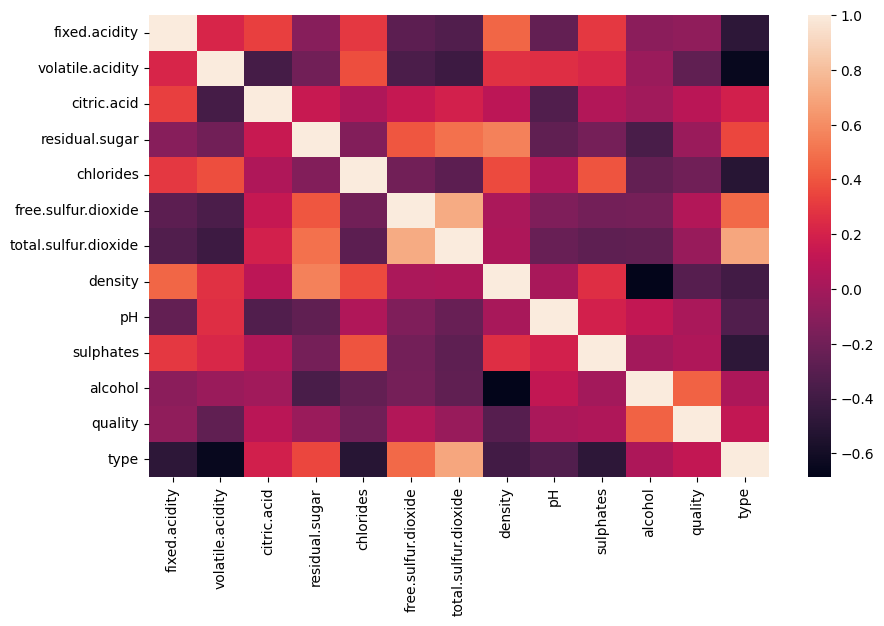

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr())
plt.show()

In [103]:
df.to_csv('final_file.csv', index=False)